<a href="https://colab.research.google.com/github/ChemistZee/ml_for_molecules/blob/main/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task

For this task you will use the BBBP dataset. Perform the following -

1. split the dataset with `RandomSplitter`, `ScaffoldSplitter` and `MolecularWeightSplitter`from deepchem. You can limit the split to train-test split with 80:20 split.
2. for the above splits, compare the distribution of the target value (p_np) in the train and test splits. Which split give the same distribution for train and test.
3. compare the distribution of molecular weights in the splits. Which split gives the same distribution for train and test.

In [1]:
# 1. split the dataset.
!pip install deepchem

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.4/552.4 kB 10.8 MB/s eta 0:00:00


In [2]:
import deepchem as dc

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


Remember to install deepchem. You can set `frac_valid = 0` here.

In [3]:
import pandas as pd

In [7]:
df = pd.read_csv('/clean.csv')

In [8]:
df.head()

,Unnamed: 0,num,name,p_np,smiles,molwt
0,0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,294.126082
1,1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,359.141884
2,2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,361.143784
3,3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,290.199428
4,4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,435.065569


In [13]:
dataset = dc.data.NumpyDataset(X= df['p_np'], y= df['molwt'])

In [15]:
dataset.X

array([1, 1, 1, ..., 1, 1, 1])

In [20]:
splitter = dc.splits.RandomSplitter()
train_dataset, test_dataset = splitter.train_test_split(dataset, frac_train=0.8)

In [22]:
train_dataset.y

array([266.1782987 , 337.01909783,  89.08406397, ..., 316.15537034,
       100.12520051, 372.193674  ])

In [ ]:
# 2. comparing the distribution of target value

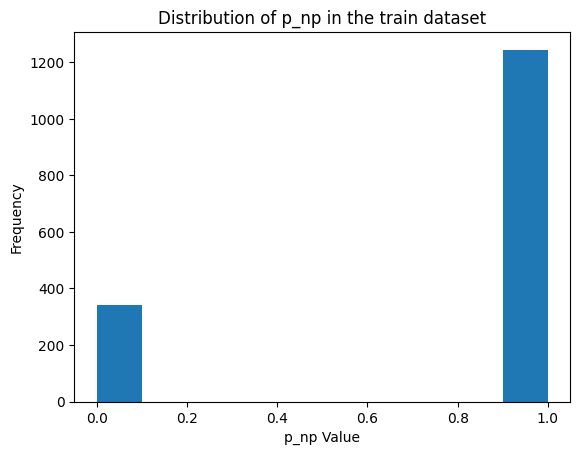

In [24]:
import matplotlib.pyplot as plt

plt.hist(train_dataset.X)
plt.xlabel('p_np Value')
plt.ylabel('Frequency')
plt.title('Distribution of p_np in the train dataset')
plt.show()

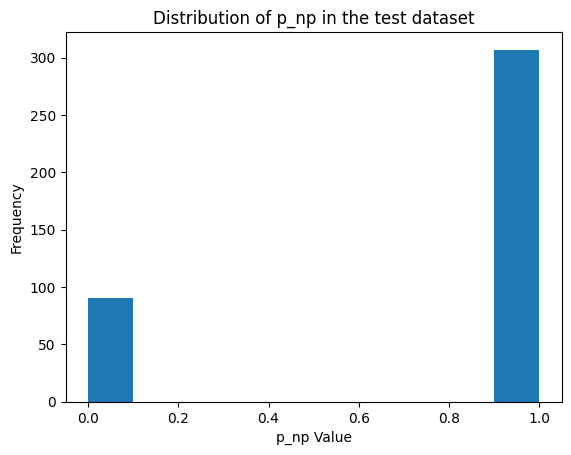

In [26]:
plt.hist(test_dataset.X)
plt.xlabel('p_np Value')
plt.ylabel('Frequency')
plt.title('Distribution of p_np in the test dataset')
plt.show()

Hint: You can use matplotlib or seaborn to plot. [This](https://youtu.be/hNNRVRmZO1s?t=8315) workshop video shows how to plot.

In [ ]:
# 3. comparing the distribution of molecular weights

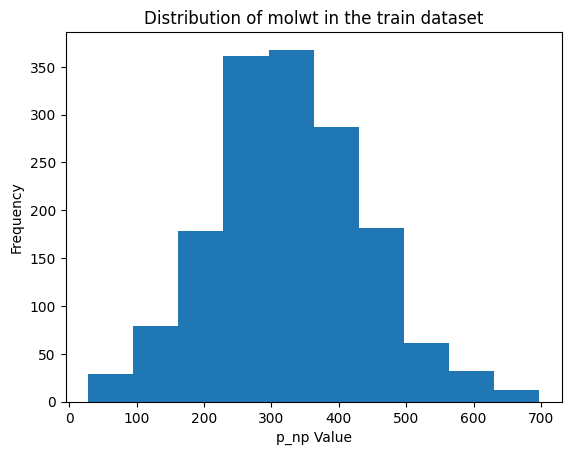

In [27]:
plt.hist(train_dataset.y)
plt.xlabel('p_np Value')
plt.ylabel('Frequency')
plt.title('Distribution of molwt in the train dataset')
plt.show()

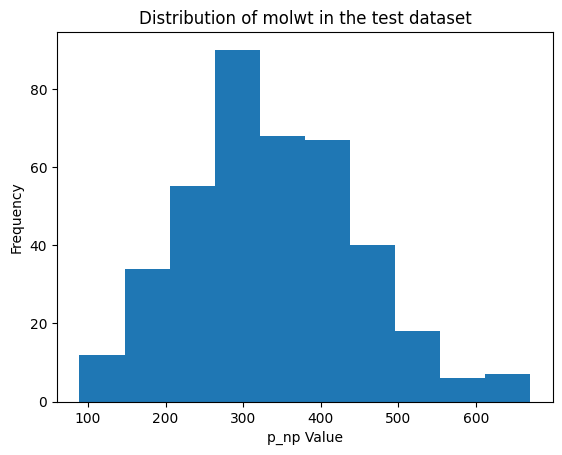

In [28]:
plt.hist(test_dataset.y)
plt.xlabel('p_np Value')
plt.ylabel('Frequency')
plt.title('Distribution of molwt in the test dataset')
plt.show()

Hint: Use the `ExactMolWeight` from [RDKit](https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html) to get the molecular weight for entries in the dataset. Then plot the distribution.

##Scaffold Splitter

In [30]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 46.7 MB/s eta 0:00:00


In [31]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors

In [45]:
smiles_list = df['smiles'].tolist()

In [47]:
import numpy as np

In [50]:
dataset_2 = dc.data.NumpyDataset.from_dataframe(df, X='p_np', y='molwt', ids='smiles')

In [51]:
scaffold_splitter = dc.splits.ScaffoldSplitter()
train, test = scaffold_splitter.train_test_split(dataset_2, frac_train=0.8)

In [52]:
train.X

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

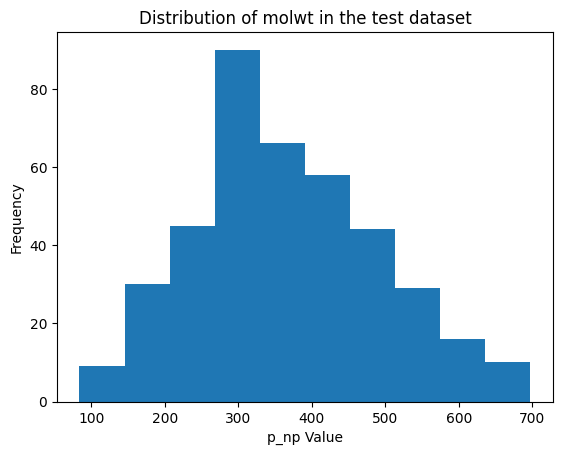

In [53]:
plt.hist(test.y)
plt.xlabel('p_np Value')
plt.ylabel('Frequency')
plt.title('Distribution of molwt in the test dataset')
plt.show()

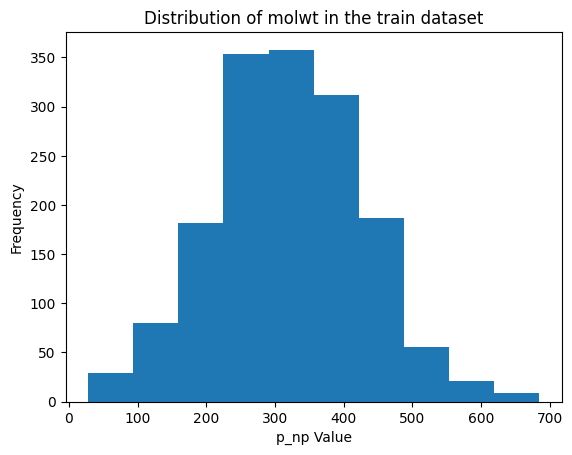

In [54]:
plt.hist(train.y)
plt.xlabel('p_np Value')
plt.ylabel('Frequency')
plt.title('Distribution of molwt in the train dataset')
plt.show()

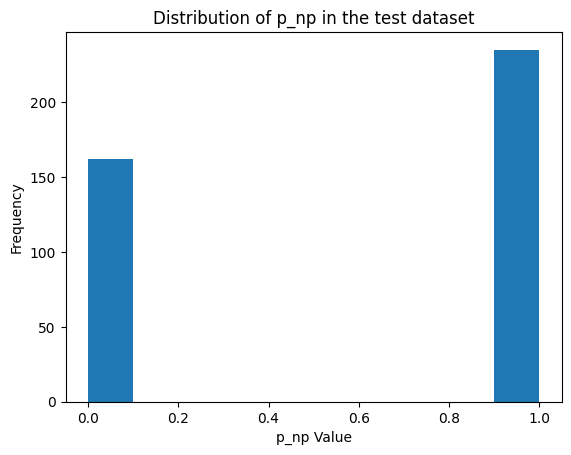

In [55]:
plt.hist(test.X)
plt.xlabel('p_np Value')
plt.ylabel('Frequency')
plt.title('Distribution of p_np in the test dataset')
plt.show()

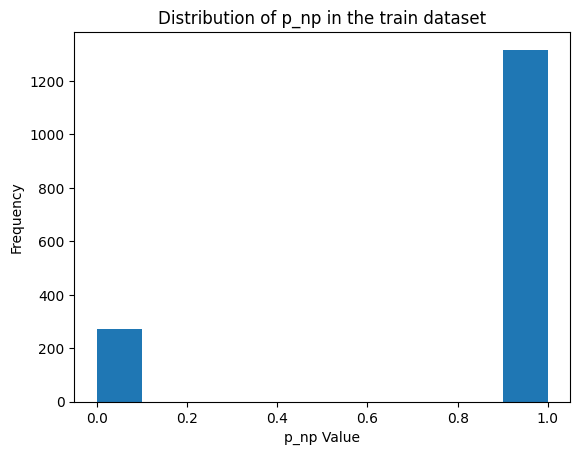

In [56]:
plt.hist(train.X)
plt.xlabel('p_np Value')
plt.ylabel('Frequency')
plt.title('Distribution of p_np in the train dataset')
plt.show()

## MolecularWeight Splitter

In [57]:
molecularweight_splitter = dc.splits.MolecularWeightSplitter()
train_, test_ = molecularweight_splitter.train_test_split(dataset_2, frac_train=0.8)

In [58]:
train_.X

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [59]:
train_.y

array([[ 28.03130013],
       [ 42.04695019],
       [ 42.04804735],
       ...,
       [420.22851701],
       [421.14356798],
       [421.14715547]])

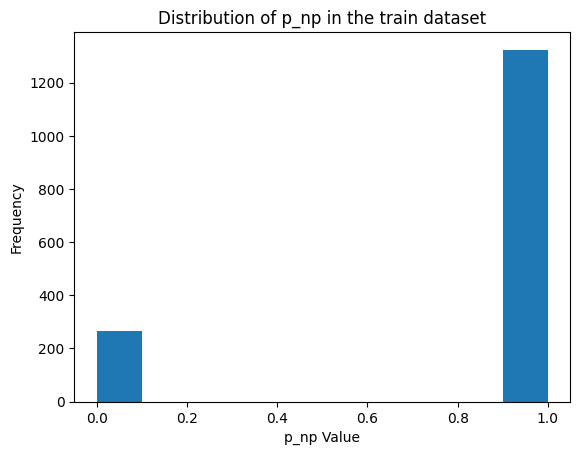

In [60]:
plt.hist(train_.X)
plt.xlabel('p_np Value')
plt.ylabel('Frequency')
plt.title('Distribution of p_np in the train dataset')
plt.show()

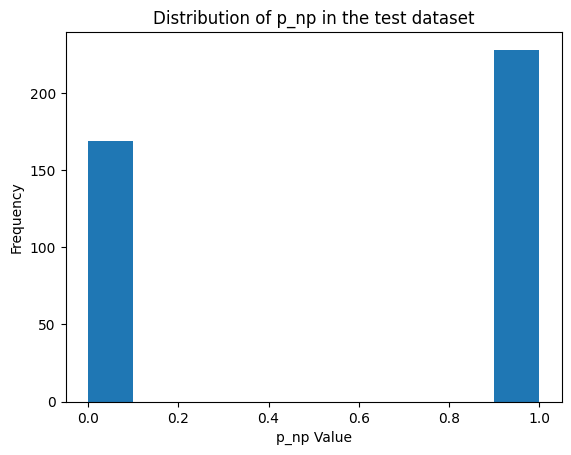

In [61]:
plt.hist(test_.X)
plt.xlabel('p_np Value')
plt.ylabel('Frequency')
plt.title('Distribution of p_np in the test dataset')
plt.show()

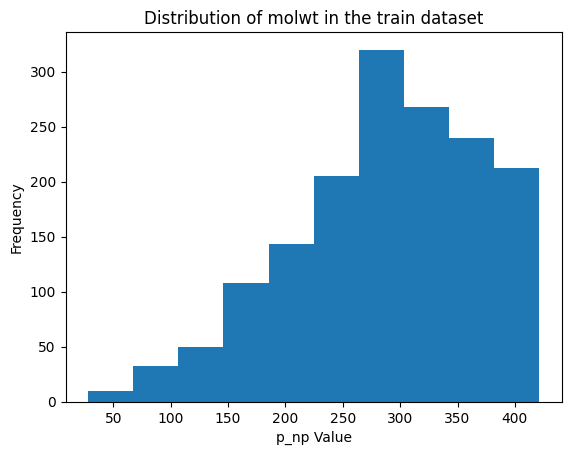

In [62]:
plt.hist(train_.y)
plt.xlabel('p_np Value')
plt.ylabel('Frequency')
plt.title('Distribution of molwt in the train dataset')
plt.show()

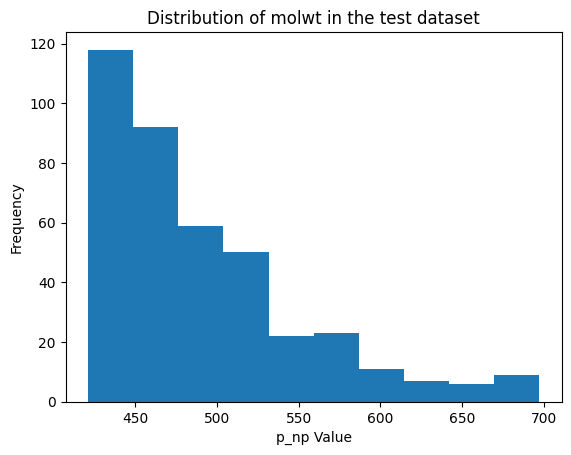

In [63]:
plt.hist(test_.y)
plt.xlabel('p_np Value')
plt.ylabel('Frequency')
plt.title('Distribution of molwt in the test dataset')
plt.show()